In [6]:
import alpaca_backtrader_api
import backtrader as bt
from datetime import datetime
import pandas as pd

In [7]:
ALPACA_API_KEY ="PK8SSSXD3FX164IYREJ5"
ALPACA_SECRET_KEY ="NPKEgtQyt3fsRodbOqn4d46V19XI5W9S8Cv64dDT"
ALPACA_PAPER = True

In [8]:
from alpaca_trade_api.rest import REST, TimeFrame
api = REST(ALPACA_API_KEY,
           ALPACA_SECRET_KEY,
           'https://paper-api.alpaca.amrkets'
          )

data = api.get_bars("AAPL", TimeFrame.Day, "2019-11-15", "2021-11-15", adjustment='raw').df
# new_data = pd.DataFrame(index=range(0,len(data)),columns=['timestamp', 'close'])
# new_data

In [10]:
symbol = 'SPY'
bar = api.get_barset(symbol, 'day', limit=730)

c = []
t = []
idx = []

for i in range(len(bar[symbol])):
    temp_c = c.append(bar[symbol][i].c) 
    temp_t = t.append(bar[symbol][i].t)
    temp_idx = idx.append(i)
    i = i + 1

df_bar_t = pd.DataFrame(t, idx,columns = ['Datetime'])
df_bar_c = pd.DataFrame(c, idx, columns = ['Close'])

new_data = pd.merge(df_bar_t,df_bar_c, left_index = True, right_index = True)
new_data



,Datetime,Close
0,2019-01-10 00:00:00-05:00,258.94
1,2019-01-11 00:00:00-05:00,258.76
2,2019-01-14 00:00:00-05:00,257.69
3,2019-01-15 00:00:00-05:00,260.21
4,2019-01-16 00:00:00-05:00,260.94
...,...,...
725,2021-11-24 00:00:00-05:00,469.37
726,2021-11-26 00:00:00-05:00,459.03
727,2021-11-29 00:00:00-05:00,464.63
728,2021-11-30 00:00:00-05:00,455.78


In [ ]:
def 

In [3]:
#import packages
import pandas as pd
import numpy as np
 
#to plot within notebook
import matplotlib.pyplot as plt
 
#setting figure size
from matplotlib.pylab import rcParams

In [73]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
 
#creating dataframe
symbol = 'AAPL'
bar = api.get_barset(symbol, 'day', limit=730)

c = []
t = []
idx = []

for i in range(len(bar[symbol])):
    temp_c = c.append(bar[symbol][i].c) 
    temp_t = t.append(bar[symbol][i].t)
    temp_idx = idx.append(i)
    i = i + 1

df_bar_t = pd.DataFrame(t, idx,columns = ['Date'])
df_bar_c = pd.DataFrame(c, idx, columns = ['Close'])

new_data = pd.merge(df_bar_t,df_bar_c, left_index = True, right_index = True)
 
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
 
#creating train and test sets
dataset = new_data.values
 
train = dataset[0:511,:]
valid = dataset[511:,:]
 
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

#--------------------------

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
 
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
 
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
 
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
 
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
 
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
 
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

451/451 - 17s - loss: 0.0175 - 17s/epoch - 37ms/step


In [74]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

4.452905414349999

/var/folders/63/s_dlyjvx16z1cy0sqjdr_z840000gn/T/ipykernel_2567/427188345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


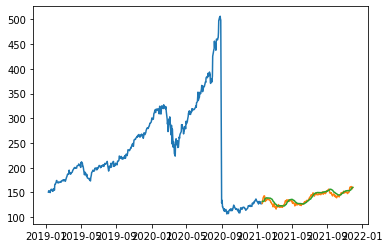

In [75]:
#for plotting
train = new_data[:511]
valid = new_data[511:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [78]:
valid

,Close,Predictions
Date,,
2021-01-19 00:00:00-05:00,127.8200,131.997620
2021-01-20 00:00:00-05:00,131.9700,131.599350
2021-01-21 00:00:00-05:00,136.8700,131.423767
2021-01-22 00:00:00-05:00,138.9699,131.685104
2021-01-25 00:00:00-05:00,142.9000,132.374741
...,...,...
2021-11-22 00:00:00-05:00,161.0800,155.029144
2021-11-23 00:00:00-05:00,161.4200,156.248367
2021-11-24 00:00:00-05:00,161.9400,157.615250


In [82]:
identify = ["None"]
for i in range(len(valid['Predictions'])-1):
    if valid['Predictions'][i] < valid['Predictions'][i+1]:
        identify.append("UP")
    elif valid['Predictions'][i] == valid['Predictions'][i+1]:
        identify.append("EQUAL")
    else:
        identify.append("DOWN")

signal = valid
signal['Signal'] = identify
signal


/var/folders/63/s_dlyjvx16z1cy0sqjdr_z840000gn/T/ipykernel_2567/2362789145.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal['Signal'] = identify


,Close,Predictions,Signal
Date,,,
2021-01-19 00:00:00-05:00,127.8200,131.997620,None
2021-01-20 00:00:00-05:00,131.9700,131.599350,DOWN
2021-01-21 00:00:00-05:00,136.8700,131.423767,DOWN
2021-01-22 00:00:00-05:00,138.9699,131.685104,UP
2021-01-25 00:00:00-05:00,142.9000,132.374741,UP
...,...,...,...
2021-11-22 00:00:00-05:00,161.0800,155.029144,UP
2021-11-23 00:00:00-05:00,161.4200,156.248367,UP
2021-11-24 00:00:00-05:00,161.9400,157.615250,UP


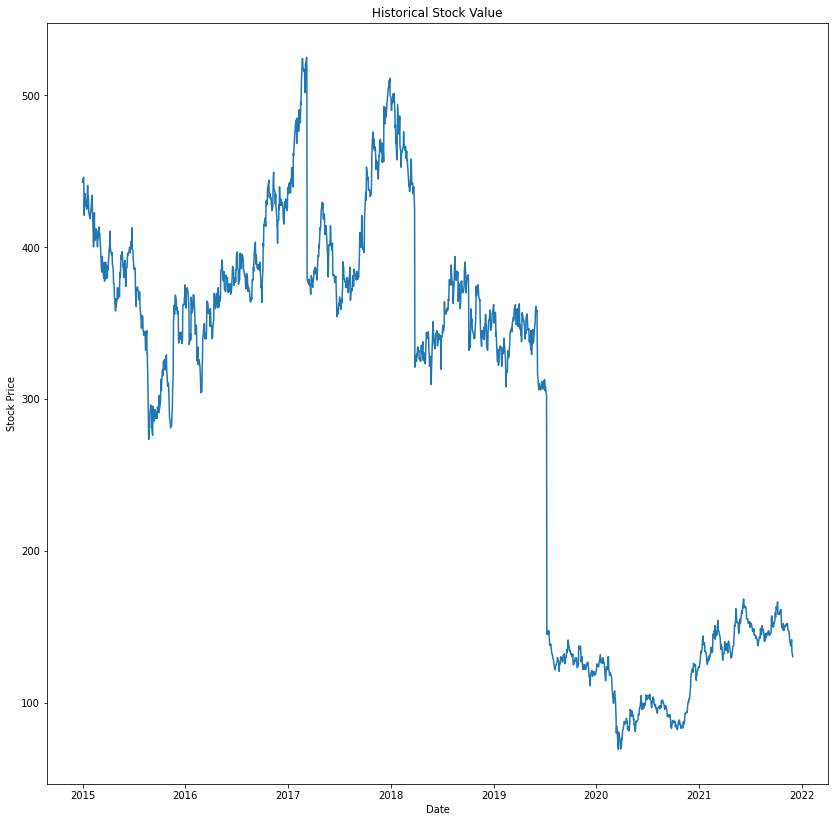

Epoch 1/15
45/45 [==============================] - 18s 119ms/step - loss: 0.0402
Epoch 2/15
45/45 [==============================] - 4s 96ms/step - loss: 0.0082
Epoch 3/15
45/45 [==============================] - 4s 84ms/step - loss: 0.0073
Epoch 4/15
45/45 [==============================] - 7s 154ms/step - loss: 0.0068
Epoch 5/15
45/45 [==============================] - 7s 157ms/step - loss: 0.0075
Epoch 6/15
45/45 [==============================] - 4s 95ms/step - loss: 0.0077
Epoch 7/15
45/45 [==============================] - 4s 100ms/step - loss: 0.0062
Epoch 8/15
45/45 [==============================] - 4s 88ms/step - loss: 0.0060
Epoch 9/15
45/45 [==============================] - 4s 88ms/step - loss: 0.0059
Epoch 10/15
45/45 [==============================] - 4s 89ms/step - loss: 0.0061
Epoch 11/15
45/45 [==============================] - 4s 82ms/step - loss: 0.0056
Epoch 12/15
45/45 [==============================] - 4s 85ms/step - loss: 0.0054
Epoch 13/15
45/45 [=============

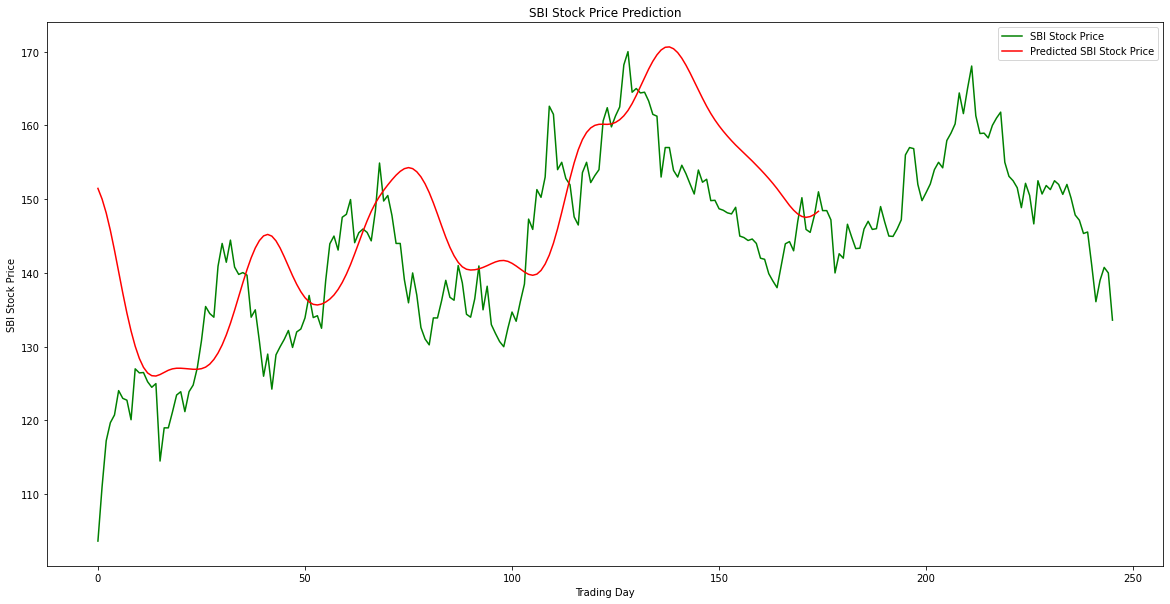

In [105]:
#Importing the libraries
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#Setting start and end dates and fetching the historical data
start = dt.datetime(2015,1,1)
end = dt.datetime(2021,11,29)
symbol = 'GAIL'
stk_data = gh(symbol,start=start,end=end)

#Visualizing the fetched data
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

#Data Preprocessing
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)


#Fetching the test data and preprocessing
testdataframe = gh(symbol,start=dt.datetime(2020,11,29),end=dt.datetime(2021,11,29))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#Visualizing the prediction
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

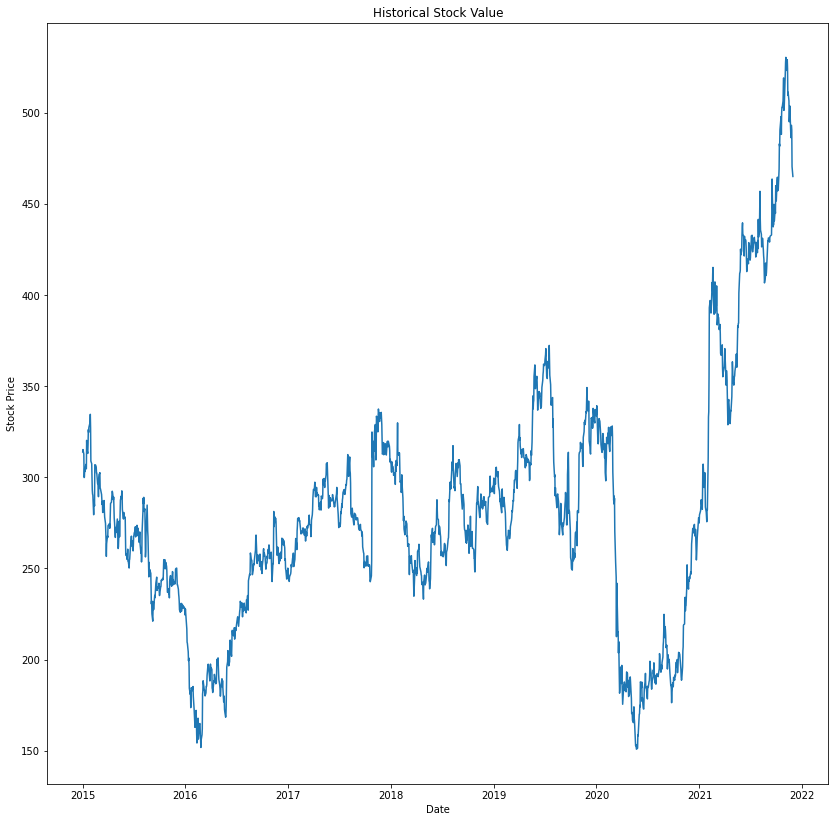

Epoch 1/15
45/45 [==============================] - 18s 156ms/step - loss: 0.0110
Epoch 2/15
45/45 [==============================] - 5s 115ms/step - loss: 0.0042
Epoch 3/15
45/45 [==============================] - 4s 84ms/step - loss: 0.0035
Epoch 4/15
45/45 [==============================] - 4s 82ms/step - loss: 0.0030
Epoch 5/15
45/45 [==============================] - 4s 86ms/step - loss: 0.0030
Epoch 6/15
45/45 [==============================] - 4s 95ms/step - loss: 0.0024
Epoch 7/15
45/45 [==============================] - 4s 90ms/step - loss: 0.0026
Epoch 8/15
45/45 [==============================] - 4s 95ms/step - loss: 0.0024
Epoch 9/15
45/45 [==============================] - 4s 88ms/step - loss: 0.0021
Epoch 10/15
45/45 [==============================] - 4s 91ms/step - loss: 0.0020
Epoch 11/15
45/45 [==============================] - 4s 91ms/step - loss: 0.0022
Epoch 12/15
45/45 [==============================] - 4s 97ms/step - loss: 0.0019
Epoch 13/15
45/45 [===============

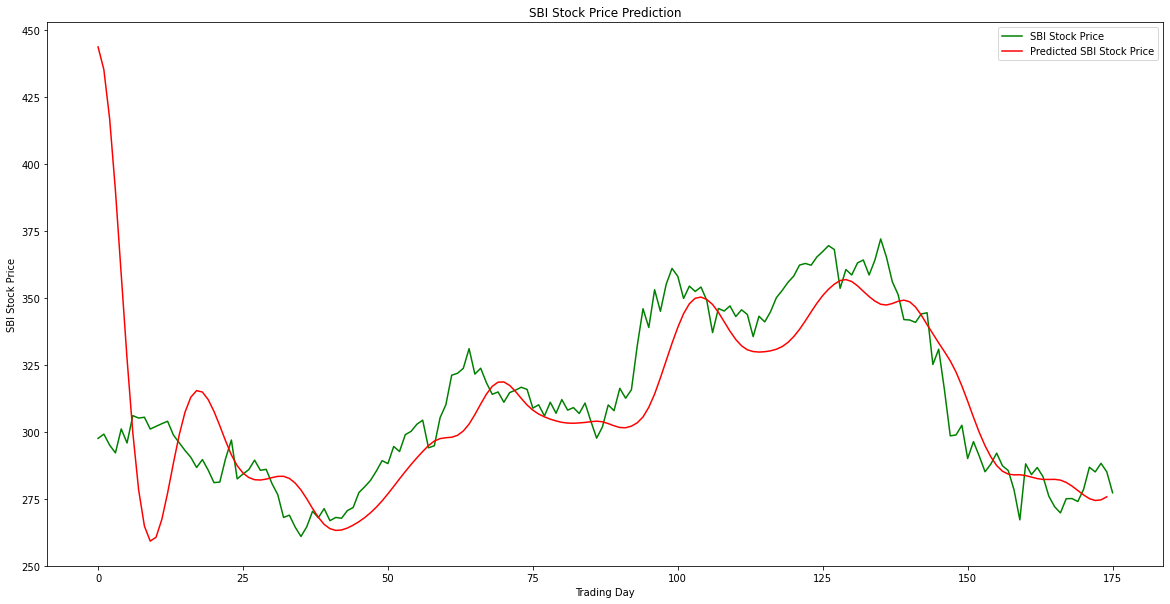

In [106]:
#Importing the libraries
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#Setting start and end dates and fetching the historical data
start = dt.datetime(2015,1,1)
end = dt.datetime(2021,11,29)
stk_data = gh(symbol='SBIN',start=start,end=end)
stk_data

#Visualizing the fetched data
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

#Data Preprocessing
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)


#Fetching the test data and preprocessing
testdataframe = gh(symbol='SBIN',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#Visualizing the prediction
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()